#### **Part 1: Analyzing Best-Seller Trends Across Product Categories**
**Objective:** Understand the relationship between product categories and their best-seller status.

**1. Crosstab Analysis:**

- Create a crosstab between the product category and the isBestSeller status.

- Are there categories where being a best-seller is more prevalent?

*Hint:* one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [1]:
import pandas as pd
df=pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
df.head(1)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [28]:
df1=pd.crosstab(df["category"],df["isBestSeller"])
df1

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [50]:
df1['Total'] = df1[False] + df1[True]
df1['Proportion_BestSeller'] = df1[True] / df1["Total"]
df_sorted = df1.sort_values('Proportion_BestSeller', ascending=False)

In [36]:
df1.sort_values('Proportion_BestSeller', ascending=False).head()

isBestSeller,False,True,Total,Proportion_BestSeller
category,,,,
Grocery,9008,556,9564,0.058135
Smart Home Security & Lighting,98,6,104,0.057692
Health & Personal Care,9017,552,9569,0.057686
Mobile Phone Accessories,248,11,259,0.042471
Power & Hand Tools,8353,306,8659,0.035339


**2. Statistical Tests:**

- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
- Compute Cramér's V to understand the strength of association between best-seller status and category.

In [39]:
df.head(1)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [40]:
df1=pd.crosstab(df["category"],df["isBestSeller"])
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(df1)
chi2_statistic, chi2_p_value
#we reject H0. Statistically significant relationship

(36540.20270061387, 0.0)

In [41]:
from scipy.stats.contingency import association

association(df1, method="cramer")
#here it says that there is a weak association

0.1222829439760564

**3. Visualizations:**

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

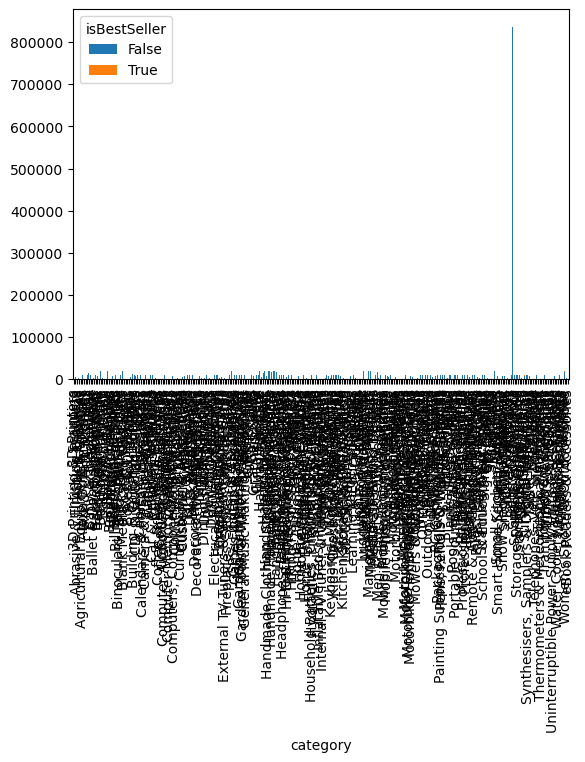

In [47]:
df1=pd.crosstab(df["category"],df["isBestSeller"])
df1.plot(kind="bar", stacked=True)
#not a good visual. there are too many categories. let's reduce number of categories

In [51]:
top5=df1.sort_values('Proportion_BestSeller', ascending=False).head()

<Axes: xlabel='category'>

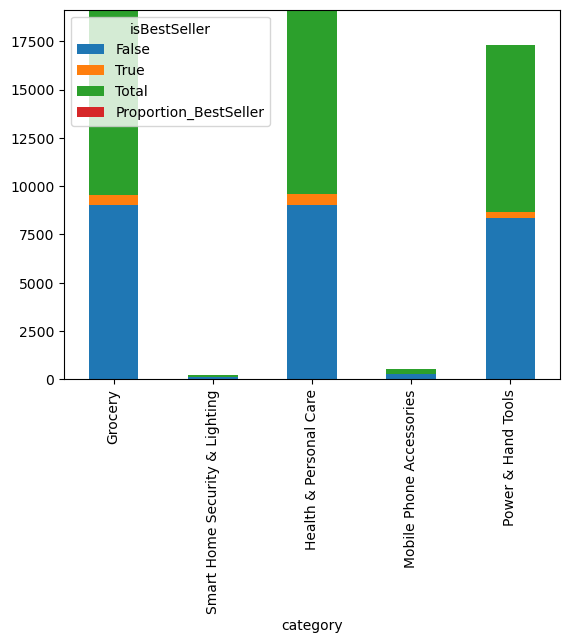

In [53]:
top5.plot(kind="bar", stacked=True) #better

### **Part 2: Exploring Product Prices and Ratings Across Categories and Brands**
**Objective:** Investigate how different product categories influence product prices.

0. Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

*Hint:* you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [57]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    #no_outliers=data.drop(outliers)

    return outliers

In [60]:
outliers=tukeys_test_outliers(df["price"])
df_filtered = df[~df["price"].isin(outliers)]

**1. Violin Plots:**

- Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

- Which product category tends to have the highest median price? Don't filter here by top categories.

In [75]:
top_20_categories = df['category'].value_counts().head(20).index
df_filtered = df[df['category'].isin(top_20_categories)]

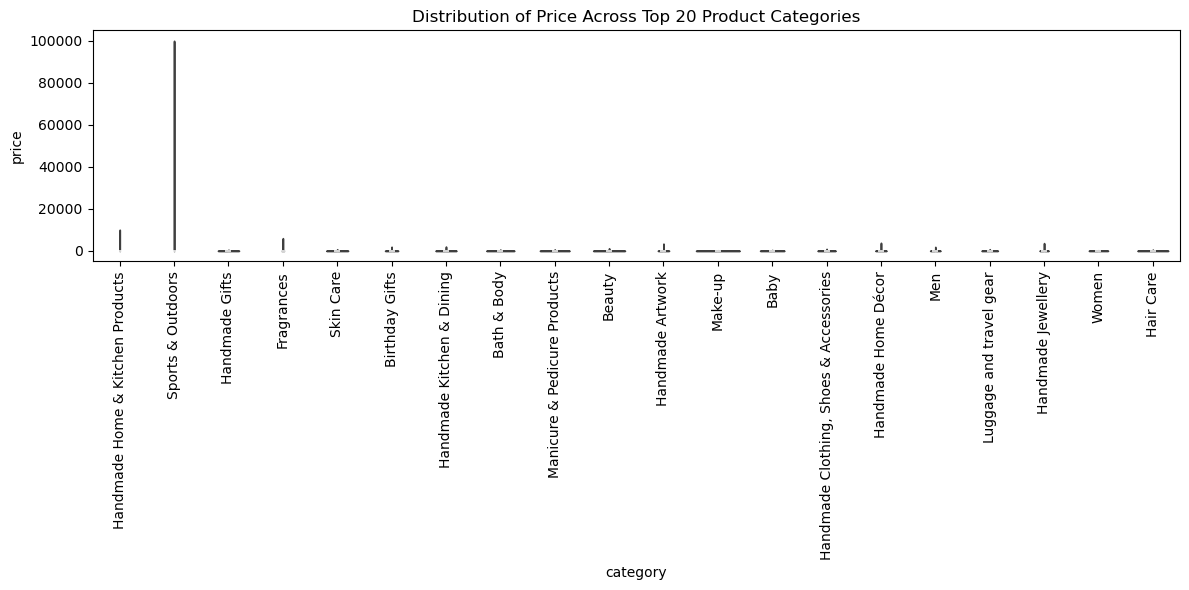

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='price', data=df_filtered)
plt.xticks(rotation=90)  
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.tight_layout()
plt.show()

In [83]:
df.groupby("category")["price"].median().sort_values(ascending=False)

category
Laptops                      1042.725
Desktop PCs                   810.400
Snowboards                    366.725
Home Audio Record Players     326.080
3D Printers                   319.000
                               ...   
Adapters                        7.050
Make-up                         7.000
Signs & Plaques                 6.990
Arts & Crafts                   5.990
Office Paper Products           4.380
Name: price, Length: 296, dtype: float64

**2. Bar Charts:**

- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

- Which product category commands the highest average price? Don't filter here by top categories.

In [84]:
top_10_categories = df['category'].value_counts().head(10).index
df_filtered = df[df['category'].isin(top_10_categories)]

In [87]:
prices=df_filtered.groupby("category")["price"].mean()
prices

category
Bath & Body                                15.042266
Beauty                                     13.222322
Birthday Gifts                             26.585166
Fragrances                                 36.202865
Hair Care                                  14.326030
Handmade Clothing, Shoes & Accessories     16.865767
Make-up                                    10.895356
Manicure & Pedicure Products               10.521108
Skin Care                                  16.340926
Sports & Outdoors                         125.769814
Name: price, dtype: float64

<Axes: xlabel='category'>

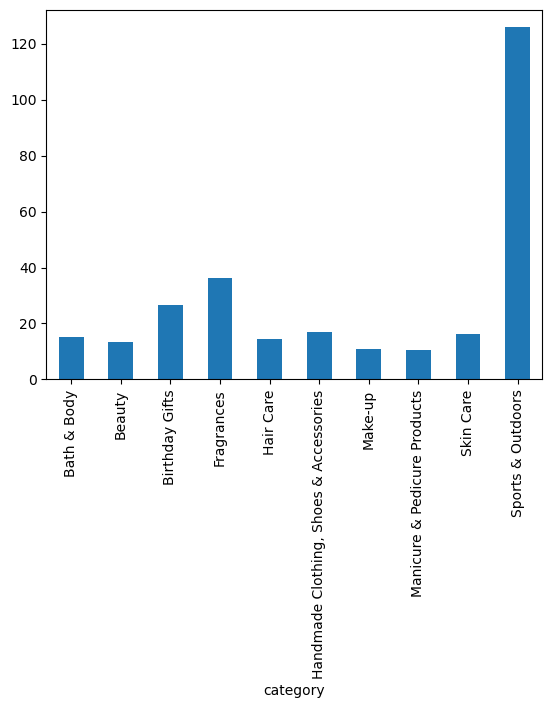

In [91]:
prices.plot(kind="bar")

**3. Box Plots:**

- Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [96]:
df_filtered.head(1)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors


<Axes: xlabel='category', ylabel='stars'>

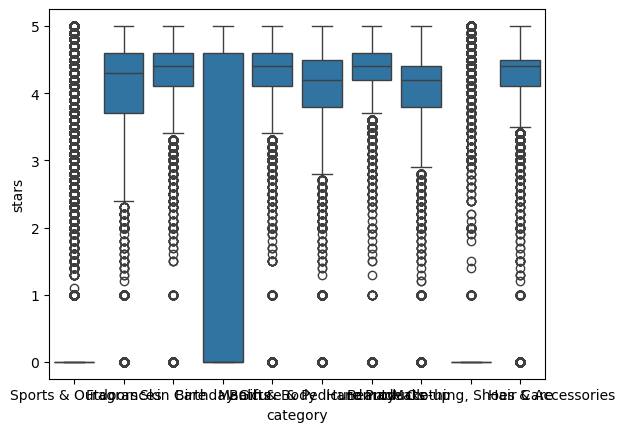

In [97]:
sns.boxplot(df_filtered,x="category",y="stars")

In [100]:
stars=df_filtered.groupby("category")["stars"].median().sort_values(ascending=False)
stars

category
Bath & Body                               4.4
Beauty                                    4.4
Hair Care                                 4.4
Skin Care                                 4.4
Fragrances                                4.3
Make-up                                   4.2
Manicure & Pedicure Products              4.2
Birthday Gifts                            0.0
Handmade Clothing, Shoes & Accessories    0.0
Sports & Outdoors                         0.0
Name: stars, dtype: float64

### **Part 3: Investigating the Interplay Between Product Prices and Ratings**
**Objective:** Analyze how product ratings (stars) correlate with product prices.

**1. Correlation Coefficients:**

- Calculate the correlation coefficient between price and stars.

- Is there a significant correlation between product price and its rating?

In [101]:
df["price"].corr(df["stars"])
#correlation is negative and weak

-0.12490673262148386

**2. Visualizations:**

- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

- Use a correlation heatmap to visualize correlations between all numerical variables.

- Examine if product prices typically follow a normal distribution using a QQ plot.

<Axes: xlabel='price', ylabel='stars'>

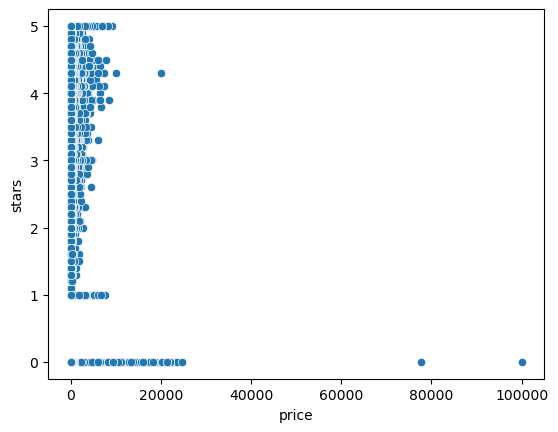

In [102]:
sns.scatterplot(data=df,x="price",y="stars")
#no apparent correlation or relation between variables

<Axes: >

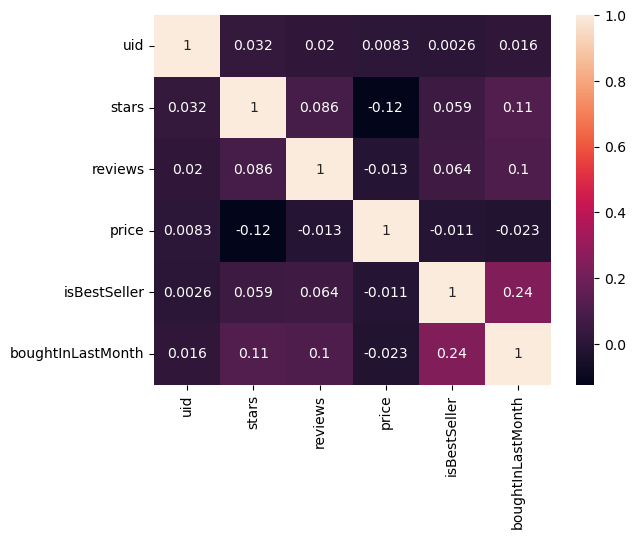

In [105]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
#weak to medium correlation between boughtinlastmonth and isbestseller

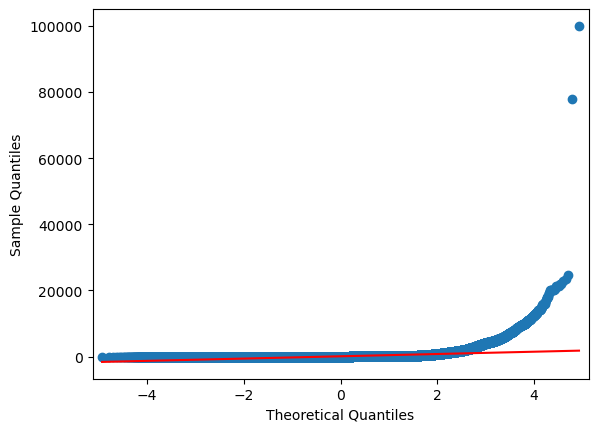

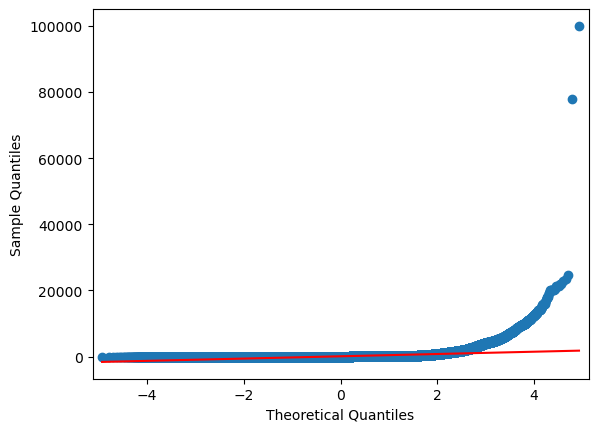

In [106]:
import statsmodels.api as sm
sm.qqplot(df["price"], line='s')
#does not follow a normal distribution. Looks like price has a right skewness
#that means there are extrem values. so pretty high prices

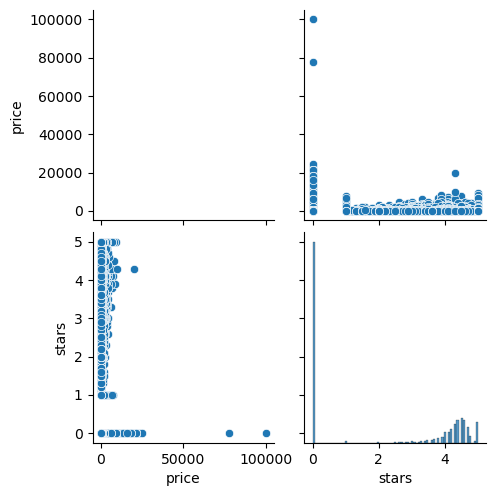

In [108]:
sns.pairplot(df[["price", "stars"]])

### **Conclusions:**


- Sports & Outdoors products are the ones with the higher price variability.
- If it is a best seller, might be more likely to have been bought in the last month.
- The higher the price, the lower the stars (but not lways since relationship is weak)
- Grocery, health and personal care, and power and hand tools are the categories with the most best seller products in proportion to all products